# Logistic Regression

## Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing the Datasets

In [2]:
dataset = pd.read_csv('Datasets/Social_Network_Ads.csv') 
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

## Splitting the Data into Training/ Testing Sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
SSc = StandardScaler()
X_train = SSc.fit_transform(X_train)
X_test = SSc.transform(X_test)

## Training the Logistic Regression Model

In [5]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [6]:
X_test[:][0].reshape(-1, 1)

array([[-0.80480212],
       [ 0.50496393]])

## Predicting a New Result

In [7]:
classifier.predict(X_test[:][0].reshape(-1, 2))

array([0], dtype=int64)

## Predicting the Test Set Result

In [8]:
yPred = classifier.predict(X_test)
results = np.column_stack((yPred, y_test))
matches = (results[:, 1] == results[:, 0])
print(f"Number of correctly classified examples: {matches.sum()}, meaning {matches.sum()}%")

Number of correctly classified examples: 89, meaning 89%


In [9]:
# Could have also done it like...
print(np.concatenate((yPred[:10].reshape(-1, 1), y_test[:10].reshape(-1, 1)), axis = 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]]


## Confusion Matrix

In [11]:
CM = confusion_matrix(yPred, y_test)
print(CM)
accuracy_score(yPred, y_test)

[[65  8]
 [ 3 24]]


0.89

## Visualising the Training Set

In [31]:
X_set, y_set = SSc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:,0].max() + 10, step = 0.25), 
                   np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

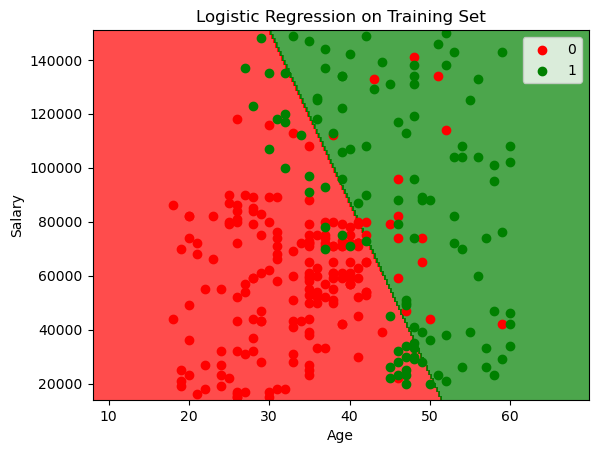

In [98]:
X_set, y_set = SSc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:,0].max() + 10, step = 0.25), 
                   np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(SSc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.7,
            cmap = ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression on Training Set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

## Visualising the Test Set

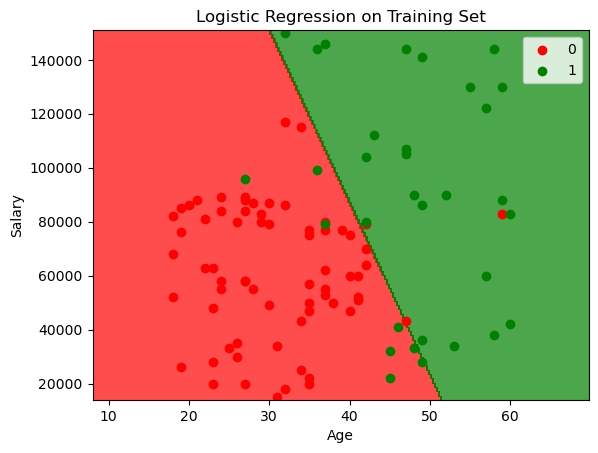

In [99]:
X_set, y_set = SSc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:,0].max() + 10, step = 0.25), 
                   np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(SSc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.7,
            cmap = ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression on Training Set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()